In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df.shape

(344, 7)

In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df.dropna().shape

(334, 7)

In [8]:
# lets drop all the NaN values and proceed further
# deleting is not the only way, we can fill with some values by following feature engg methods

df = df.dropna()

In [9]:
df.shape

(334, 7)

In [10]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [11]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [12]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [13]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [14]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [15]:
# we can delete this row or we can try to fill sex by either MALE or FEMALE..
# based the Gentoo species characteristics w.r.t. i/p features

In [16]:
df[df['species']=='Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [17]:
# by observing sex='.' column with sex='MALE' and sex='FEMALE' columns,
# majority of the features are close to FEMALE, so lets put 'FEMALE' for this row

In [18]:
df.loc[336]['sex']='FEMALE'

/tmp/ipykernel_37805/259653432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[336]['sex']='FEMALE'


In [19]:
df.loc[336]
# the operation was not inplace

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                       .
Name: 336, dtype: object

In [20]:
df.at[336,'sex'] = "FEMALE"

In [21]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

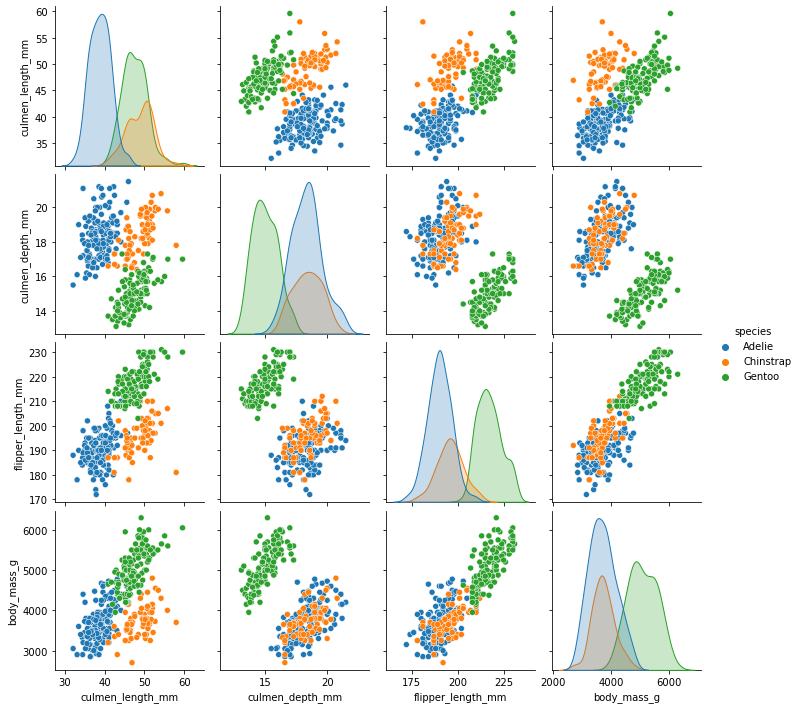

In [22]:
sns.pairplot(data=df,hue='species')

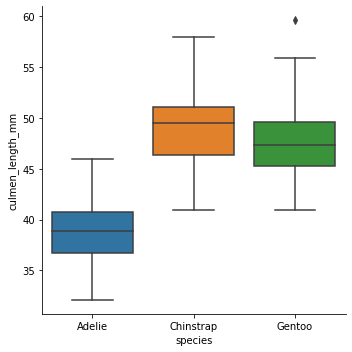

In [23]:
sns.catplot(data=df,x='species',y='culmen_length_mm',kind='box')

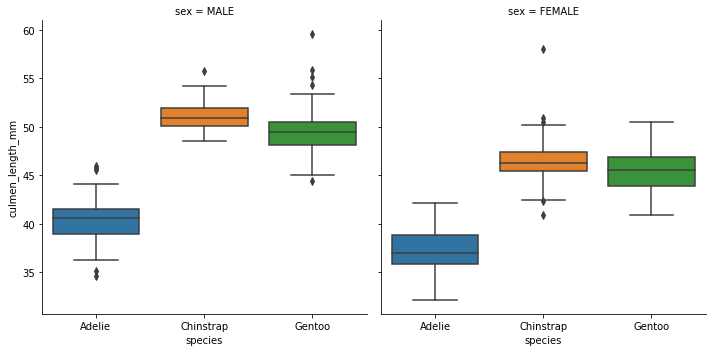

In [24]:
sns.catplot(data=df,x='species',y='culmen_length_mm',kind='box',col='sex')

In [25]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [26]:
# LOGISTIC REGRESSION

In [27]:
X = df.drop('species',axis=1)
y = df['species']

In [28]:
X = pd.get_dummies(X,drop_first=True)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

In [34]:
scaled_X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_model = LogisticRegression()

In [37]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [38]:
log_model.coef_

array([[-2.17384394,  0.72292496, -0.59306456, -0.27172603, -0.35072178,
         0.43458865,  0.7157161 ],
       [ 1.80386395,  0.38983925, -0.3398119 , -0.62335284,  1.12030864,
        -0.16480021, -0.54313452],
       [ 0.36997999, -1.11276421,  0.93287647,  0.89507887, -0.76958686,
        -0.26978843, -0.17258158]])

In [39]:
y_pred_log_reg = log_model.predict(scaled_X_test)


In [40]:
y_pred_log_reg

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adel

In [41]:
y_test.head()

202    Chinstrap
315       Gentoo
141       Adelie
200    Chinstrap
299       Gentoo
Name: species, dtype: object

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [43]:
accuracy_score(y_test, y_pred_log_reg)

0.9801980198019802

/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


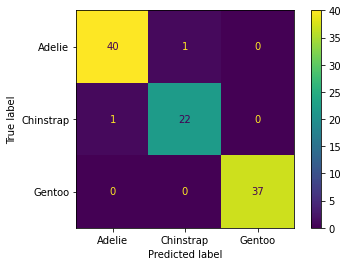

In [44]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [83]:
print(classification_report(y_test,y_pred_log_reg))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [45]:
# DECISION TREES

In [46]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [47]:
# separation of X and y from dataframe

In [48]:
X = df.drop('species',axis=1)
y = df['species']

In [49]:
# Decision Trees implementation in sklearn expects multi-categorical feature columns to be converted to dummy variables
# so convert 'island' and 'sex' to dummy variables (one-shot encoding), but not 'species' becoz it is o/p variable

In [50]:
X = pd.get_dummies(X,drop_first=True)

In [51]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1


In [52]:
# Train-Test Split

from sklearn.model_selection import train_test_split


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [54]:
# IMPORTANT:

# FEATURE SCALING is NOT REQUIRED in Decision Trees
# since, we are not going to compare multiple features at the same time in a single node split

In [55]:
# Decision Tree MODEL creattion

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
model = DecisionTreeClassifier()

# lets create a model with Default parameters and observe the performance
# next we will see hyperparameter tuning

In [58]:
model.fit(X_train,y_train)

# remainder: NO NEED OF FEATURE SCALING in DECISION TREES
# thats why we have passed the UNSCALED X_train, y_train for Training the model

DecisionTreeClassifier()

In [59]:
y_pred_base = model.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# since we are doing classification, the concerned metrics are imported

In [61]:
confusion_matrix(y_test,y_pred_base)

array([[40,  1,  0],
       [ 2, 21,  0],
       [ 0,  0, 37]])

In [62]:
print(classification_report(y_test,y_pred_base))

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


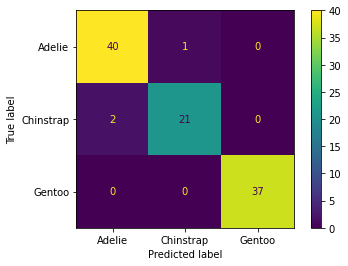

In [63]:
plot_confusion_matrix(model,X_test,y_test)

# for 'plot_confusion_matrix' inputs are: trained model, X_test and y_test

In [64]:
model.feature_importances_

# these values indicate the relative importance in decision making corresponding to the i/p features

array([0.32591819, 0.07469539, 0.53120101, 0.        , 0.0681854 ,
       0.        , 0.        ])

In [65]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [66]:
# lets create a dataframe X column name and its relative importance

In [67]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,
            columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
flipper_length_mm,0.531201
culmen_length_mm,0.325918
culmen_depth_mm,0.074695
island_Dream,0.068185
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.000000


In [68]:
# if we see above relative importance values, the decision tree did not consider some features
# if we want, we can force decision tree to consider those features, but that may lead to overfitting

In [69]:

from sklearn.tree import plot_tree

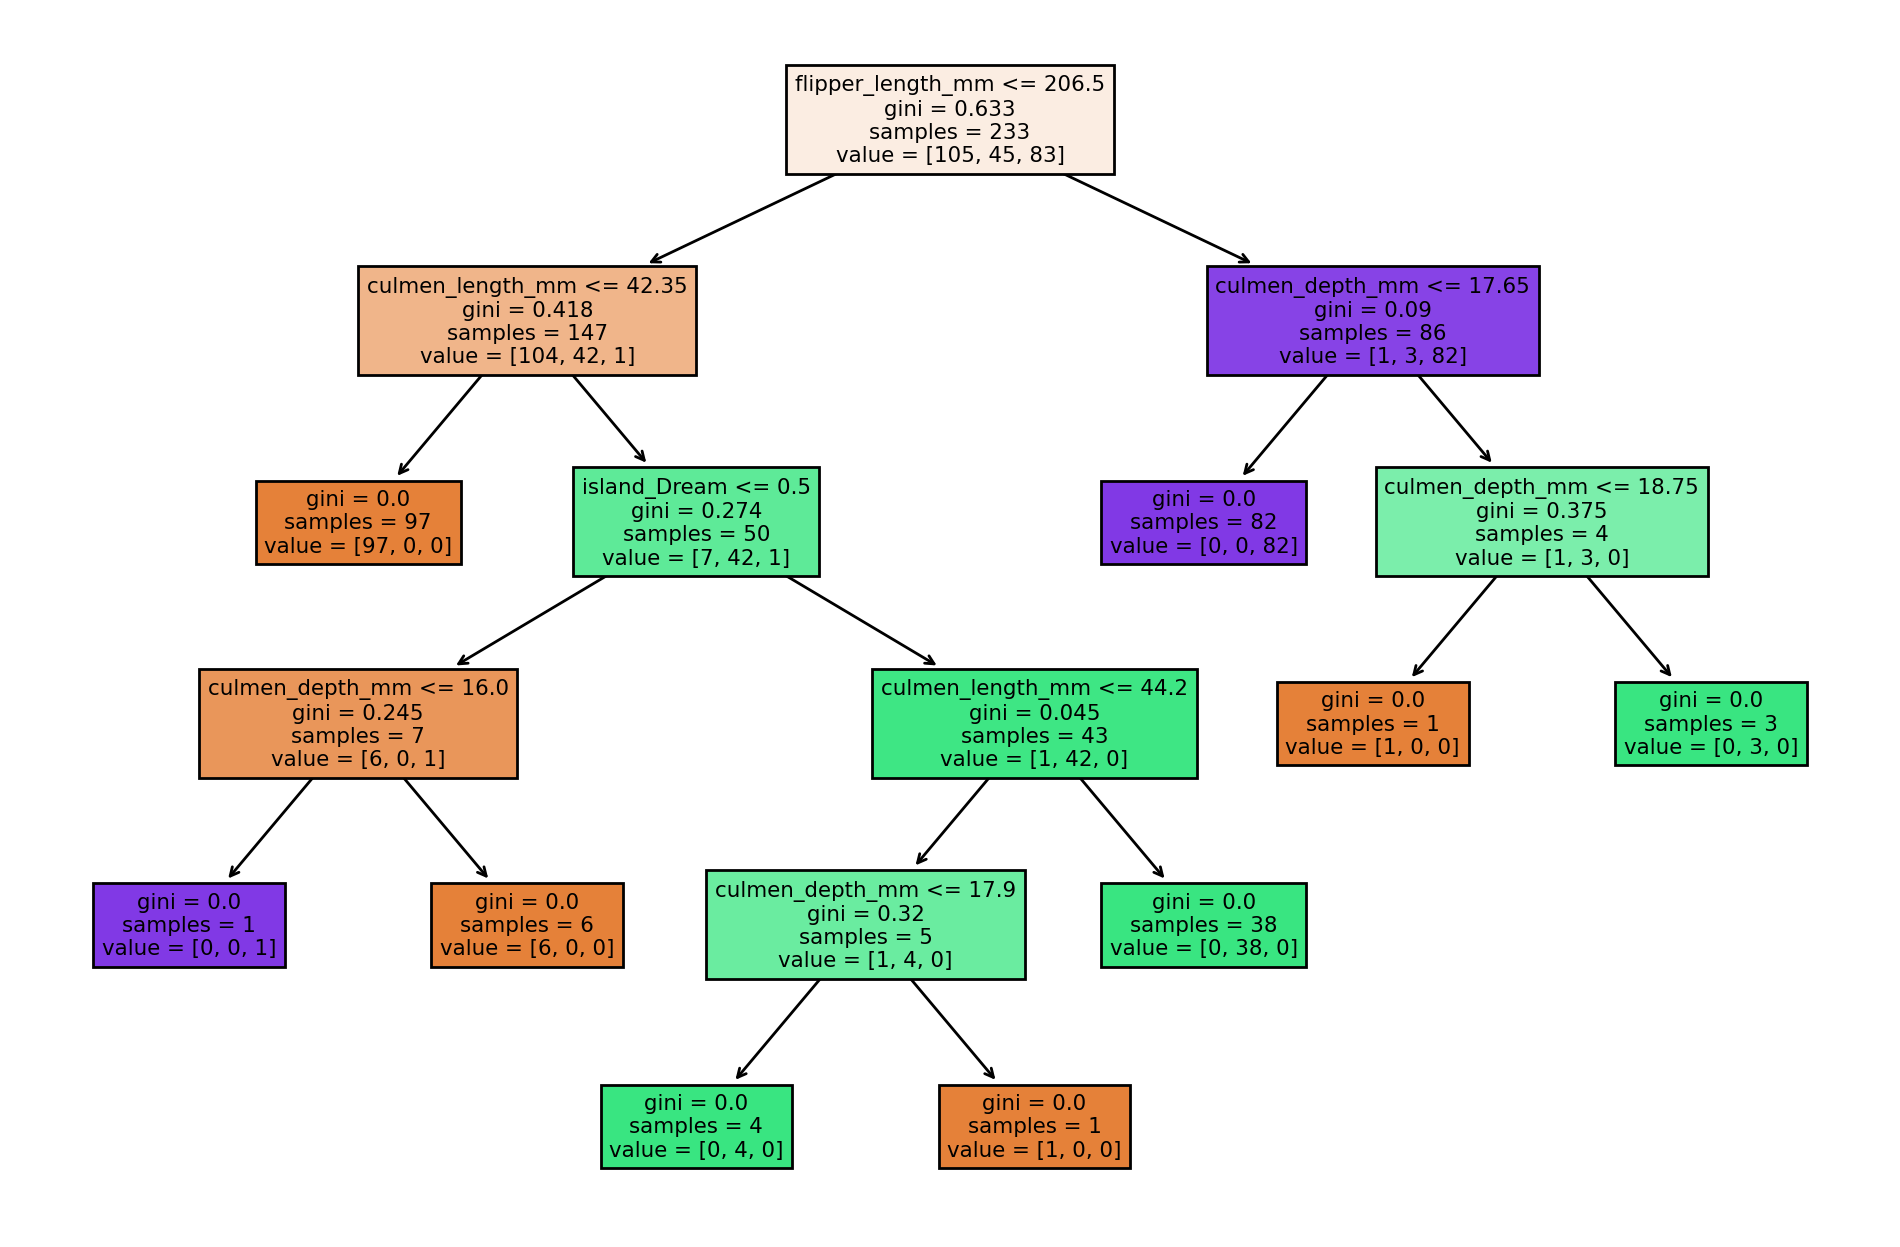

In [70]:
# PLOTTING DECISION TREE
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model,feature_names=X.columns,filled=True); # a semicolon at the end of a line suppresses any text o/p to be printed


#### Root Node: The feature selected for root node splitting is flipper_length_mm thats why the relative importance value of that Feature is high than other Features. 
#### samples = 233 at root node, which means 233 nodes have passed this node for decision, which is the size of X_train
#### 'values'  is no.of points in each class that passed through that node. If we add 105+45+83 then it is 233.
#### Gini impurity calculated at each node is also mentioned in the nodes. If Gini value = 0, it means there is no impurity at that node and its a clear classification for that class (there will not be any ambiguity). There are two  Terminal nodes (purple color) in the Decision tree with Gini=0 and values=[0,0,n_c], where two 0s represents that there are no points corresponding to other classes and n_c is the no.of nodes of that particular class


In [75]:
# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rfc = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [78]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [79]:
y_pred_rfc = rfc.predict(X_test)

/home/smadhu/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


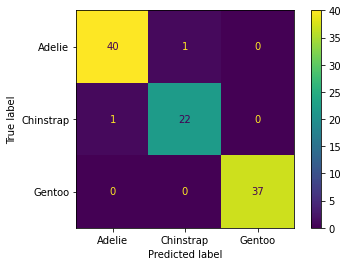

In [81]:
plot_confusion_matrix(rfc,X_test,y_test)

In [82]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101

